In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats
import datetime as dt

In [230]:
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [232]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [234]:
from sklearn.impute import SimpleImputer

df = df.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = mean_imputer.fit_transform(df)

In [235]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [236]:
cat_features = np.array([i for i in df.columns.tolist() if df[i].dtype == 'object'])
num_features = np.array([i for i in df.columns.tolist() if df[i].dtype != 'object'])

print("Number features column =" , len(num_features))
print("Categorial features column =" , len(cat_features))

Number features column = 3
Categorial features column = 5


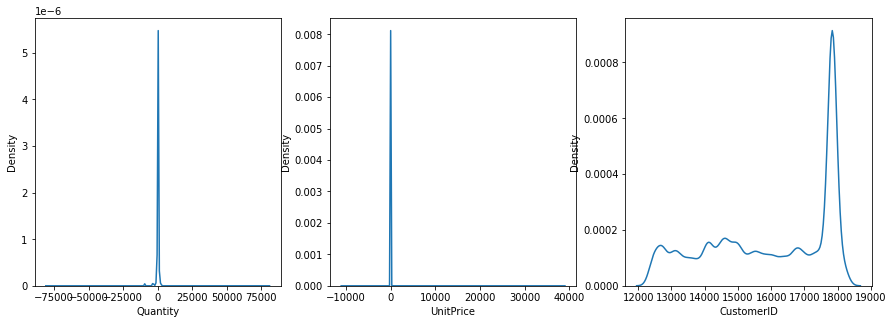

In [237]:
plt.figure(figsize=(15,70), facecolor='white')
plotnumber = 1

for i in num_features:
    if plotnumber<=50 :
        ax = plt.subplot(12,3,plotnumber)
        sns.kdeplot(df[i])
    plotnumber+=1
plt.show()

In [238]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [239]:
df = df.copy()
#extract month of time purchased
df['month'] = df['InvoiceDate'].dt.month
#extract year of time purchased
df['year']= df['InvoiceDate'].dt.year
#change the data type to str
df['month-year'] = df['InvoiceDate'].dt.strftime('%b') + '-' + df['InvoiceDate'].dt.strftime('%Y')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,month-year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Dec-2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Dec-2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Dec-2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Dec-2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Dec-2010


In [240]:
#create a new dataframe to get num order per month
num_order = pd.DataFrame(df.groupby(['year','month','month-year'])['InvoiceNo'].nunique())
num_order


InvoiceNo
year month month-year           
2010 12    Dec-2010         2025
2011 1     Jan-2011         1476
     2     Feb-2011         1393
     3     Mar-2011         1983
     4     Apr-2011         1744
     5     May-2011         2162
     6     Jun-2011         2012
     7     Jul-2011         1927
     8     Aug-2011         1737
     9     Sep-2011         2327
     10    Oct-2011         2637
     11    Nov-2011         3462
     12    Dec-2011         1015

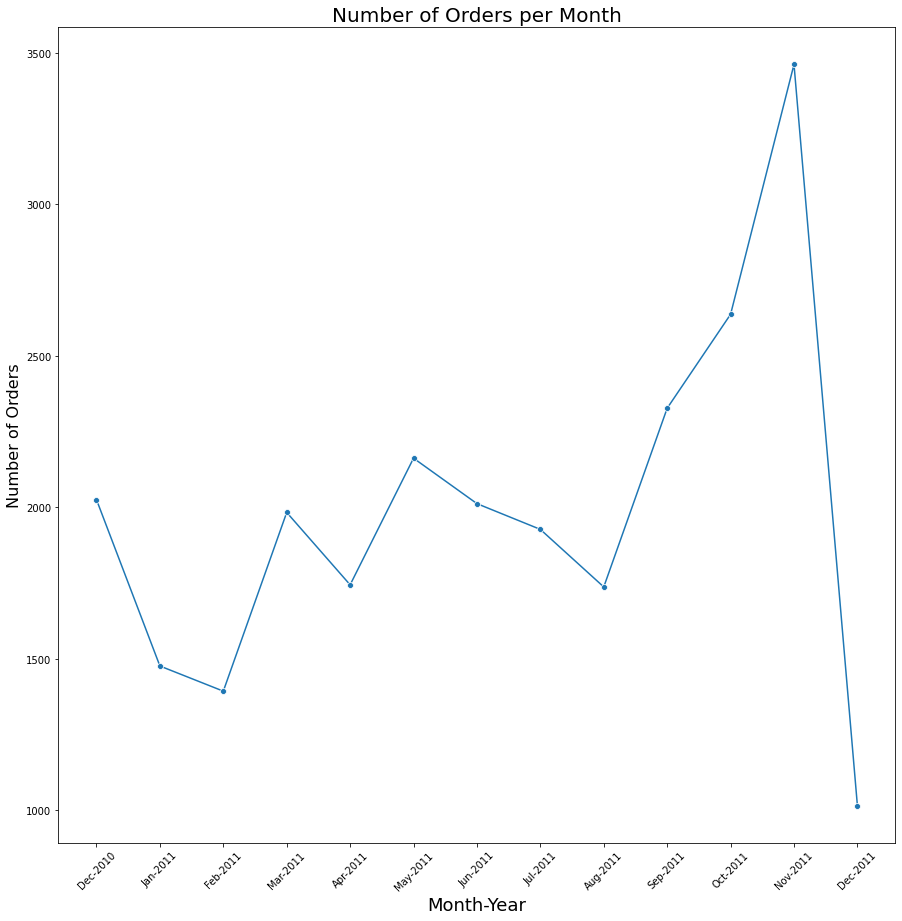

In [241]:

#timeline chart
plt.figure(figsize=(15,15))
sns.lineplot(data=num_order, x='month-year', y='InvoiceNo', marker='o')
plt.title('Number of Orders per Month', fontsize=20)
plt.xlabel('Month-Year',fontsize=18)
plt.ylabel('Number of Orders',fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [242]:
df['day']= df['InvoiceDate'].dt.day_name()
df.head()

week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
num_day = df.groupby('day')['InvoiceNo'].nunique().reindex(week_day)
num_day= pd.DataFrame(num_day)
num_day.reset_index(inplace=True)
num_day.columns = ['days','number_of_orders']
num_day

,days,number_of_orders
0,Monday,4138.0
1,Tuesday,4722.0
2,Wednesday,4815.0
3,Thursday,5660.0
4,Friday,4184.0
5,Saturday,NaN
6,Sunday,2381.0


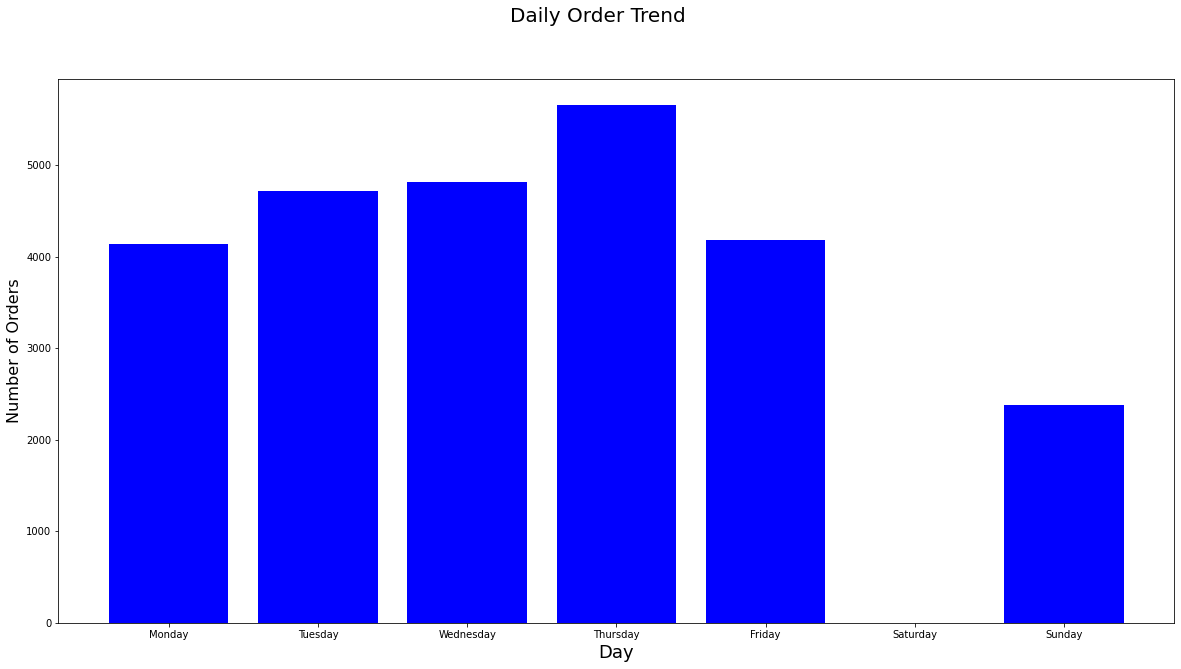

In [243]:
#timeline chart
fig = plt.figure(figsize=(20, 10))

fig.suptitle('Daily Order Trend', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of Orders', fontsize=16)

x = num_day['days']
y = num_day['number_of_orders']
plt.bar(x, y,color='blue')
plt.show()

# Cohort Analysis

In [244]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group customers based on their first purchase date
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df['CohortMonth'] = df['CohortMonth'].apply(lambda x: x.strftime('%Y-%m'))

# Calculate the number of months between the invoice date and the cohort month
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df['CohortIndex'] = (pd.to_datetime(df['InvoiceMonth']) - pd.to_datetime(df['CohortMonth'])).dt.days//30 + 1

# Calculate the number of customers in each cohort
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot the data to create a cohort analysis heatmap
cohort_counts = cohort_data.pivot_table(index = 'CohortMonth', columns = 'CohortIndex', values = 'CustomerID')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

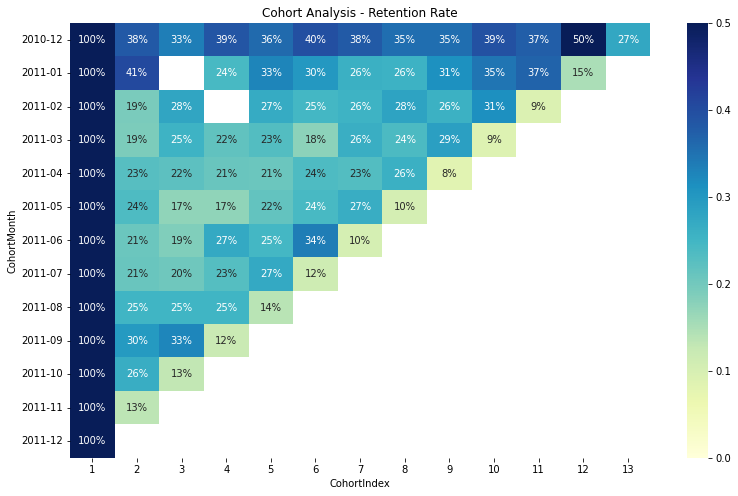

In [245]:
plt.figure(figsize=(13, 8))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.0, vmax = 0.5, cmap = 'YlGnBu')
plt.show()

# RFM

In [291]:
## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [292]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity'] 

In [293]:
today_date = dt.datetime(2011, 12, 1)

In [294]:
rfm = df.groupby('CustomerID').agg(
    {
        'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'InvoiceNo'    : lambda InvoiceNo: InvoiceNo.nunique(),
                                     'TotalPrice' : lambda total_price: total_price.sum()
                                     }
                                )

rfm.columns = ['recency', 'frequency', 'monetary']

In [304]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,-7,7,4310.00
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40


c:\Users\GAMER\anaconda3\envs\Machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\GAMER\anaconda3\envs\Machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\GAMER\anaconda3\envs\Machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level f

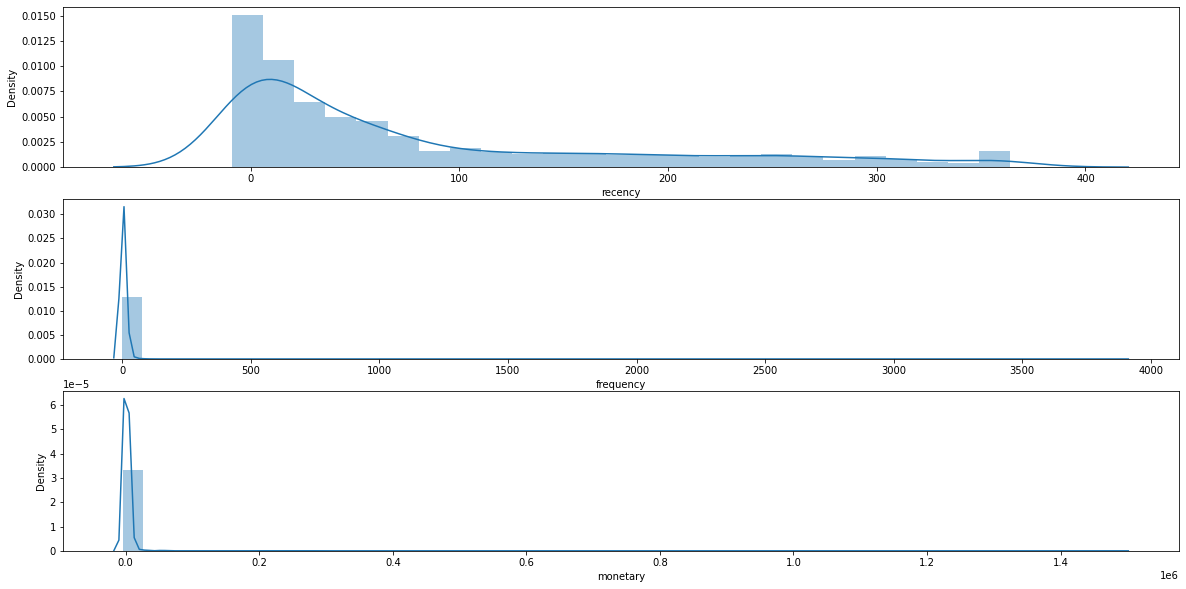

In [305]:
# get visualization of distribution 
fig = plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1); sns.distplot(rfm['recency'])
plt.subplot(3, 1, 2); sns.distplot(rfm['frequency'])
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary'])
plt.show()

recency's: Skew: 1.2489345981317217, : SkewtestResult(statistic=26.759564926962206, pvalue=9.556410278465924e-158)


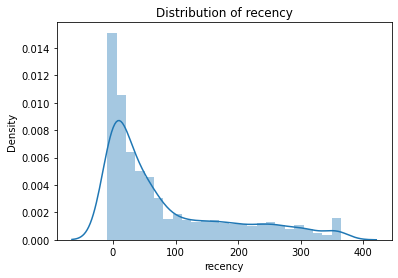

In [300]:
check_skew(rfm, 'recency')

frequency's: Skew: 63.863053111814835, : SkewtestResult(statistic=111.78280605150974, pvalue=0.0)


c:\Users\GAMER\anaconda3\envs\Machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



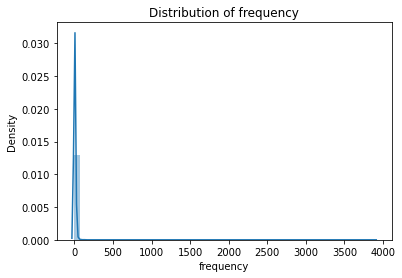

In [301]:
check_skew(rfm, 'frequency')

monetary's: Skew: 55.677649068598065, : SkewtestResult(statistic=108.74703509318087, pvalue=0.0)


c:\Users\GAMER\anaconda3\envs\Machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



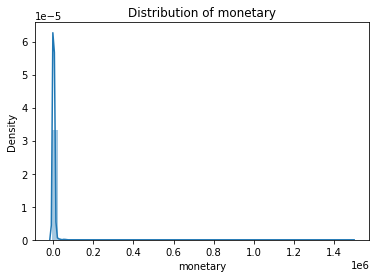

In [302]:
check_skew(rfm, 'monetary')

# K-Means Clustering

In [306]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(rfm)
df_scaled = pd.DataFrame(df_scaled,columns=['recency', 'frequency', 'monetary'])
df_scaled["CustomerID"] = rfm.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

In [307]:
df_scaled

,recency,frequency,monetary
CustomerID,,,
12346.0,2.316565,-0.066207,-0.093203
12347.0,-0.889046,0.018153,0.086967
12348.0,-0.164558,-0.032463,-0.018073
12349.0,-0.730254,-0.083079,-0.019732
12350.0,2.167698,-0.083079,-0.079224
...,...,...,...
18280.0,1.840190,-0.083079,-0.085653
18281.0,0.877514,-0.083079,-0.089824
18282.0,-0.839423,-0.049335,-0.085820


In [308]:
# Standardize the RFM variables
X = df_scaled[['recency', 'frequency', 'monetary']]

In [309]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
cluster_labels = kmeans.labels_

rfm_k = rfm.assign(Cluster=cluster_labels)
rfm_k.groupby(['Cluster']).agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean', 'count']
    }).round(0)

recency frequency   monetary      
           mean      mean       mean count
Cluster                                   
0           9.0       7.0     2190.0  2145
1         181.0       2.0      588.0   624
2          -9.0    3879.0  1488023.0     1
3          71.0       3.0      958.0  1072
4         300.0       2.0      360.0   506
5          -6.0      65.0   241137.0     3
6          -3.0      74.0    60130.0    21

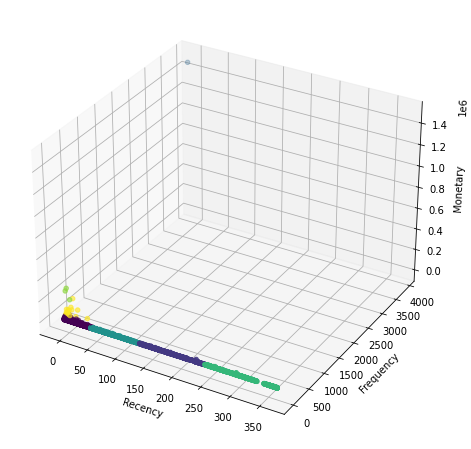

In [311]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['recency'], rfm['frequency'], rfm['monetary'], c=cluster_labels, cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

# RFM-Score

In [315]:
rfm['RecencyScore'] = pd.qcut(rfm['recency'], 3, labels=[1, 2, 3])
rfm['FrequencyScore'] = pd.qcut(rfm['frequency'], 3, labels=[1, 2, 3])
rfm['MonetaryScore'] = pd.qcut(rfm['monetary'], 3, labels=[1, 2, 3])

In [316]:
rfm['RFM_Score'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

In [317]:
# Group customers based on their RFM score and analyze each group's behavior
rfm_scores = rfm.groupby('RFM_Score').agg({'recency':'mean', 'frequency':'mean', 'monetary':['mean', 'count']}).round(0)
rfm_scores.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Count']
rfm_scores = rfm_scores.sort_values('Avg_Monetary', ascending=False)
rfm_scores.head()


,Avg_Recency,Avg_Frequency,Avg_Monetary,Count
RFM_Score,,,,
133,-0.0,21.0,9055.0,725
233,37.0,9.0,3150.0,322
333,136.0,8.0,2704.0,70
323,144.0,3.0,2398.0,48
123,3.0,4.0,2036.0,87


# Customer Lifetime Value (CLV)

In [318]:
# Calculate the total amount spent by each customer
rfm['Total_Spent'] = rfm['frequency'] * rfm['monetary']

# Calculate the average order value (AOV) for each customer
rfm['AOV'] = rfm['monetary'] / rfm['frequency']

# Calculate the customer lifetime value (CLV) using the formula: CLV = AOV * Frequency * Customer Lifetime
# Here, we assume a customer lifetime of 2 years
rfm['CLV'] = rfm['AOV'] * rfm['frequency'] * 2

# Group customers based on their RFM score and calculate the average CLV for each group
clf = rfm.groupby('CustomerID').agg({'CLV':'mean'}).round(0)
clf = clf.sort_values('CLV', ascending=False)
clf.head()

,CLV
CustomerID,
17841.0,2976046.0
14646.0,558978.0
18102.0,512877.0
17450.0,374964.0
14911.0,265145.0
